In [1]:
%matplotlib inline
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import matplotlib
import matplotlib.pyplot as plt
import os
import pyspark
import pandas as pd
# Make plots bigger
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [4]:
liste_compagny = ["TOT", "TSLA", "MSFT", "IBM"]

In [2]:
# create model

In [3]:
# One way of loading additional packages to spark
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages org.mongodb.spark:mongo-spark-connector_2.11:2.2.0 pyspark-shell'

In [ ]:
liste_compagny = [tot]

TOT
++
||
++
++



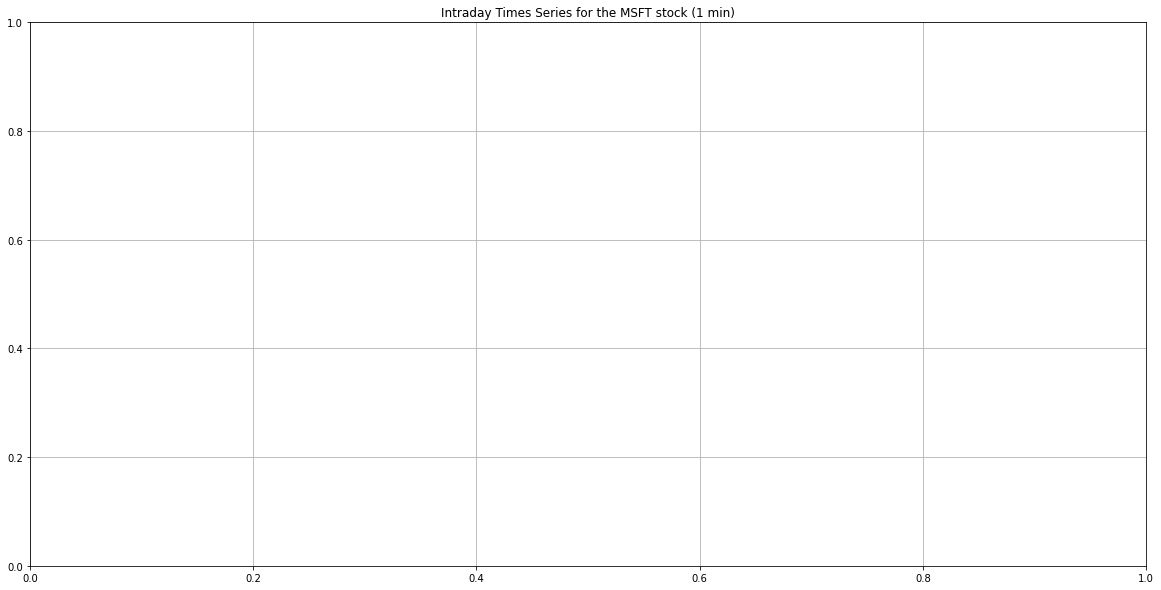

TSLA
+--------------------+--------+-------------------+--------+-------+------+-------+
|                 _id|   close|               date|    high|    low|  open| volume|
+--------------------+--------+-------------------+--------+-------+------+-------+
|[5f596dca23fa1d65...|  324.31|2020-09-08 19:57:00|   325.5| 324.28| 325.2|10538.0|
|[5f596dca23fa1d65...|  325.75|2020-09-08 19:56:00|  325.75|  325.0|325.28|14457.0|
|[5f596dca23fa1d65...|  325.75|2020-09-08 19:55:00|325.8499| 324.34|324.34|20974.0|
|[5f596dca23fa1d65...|  324.13|2020-09-08 19:54:00|  324.49|  323.2| 323.5|18008.0|
|[5f596dca23fa1d65...|  323.35|2020-09-08 19:53:00|  323.35|  323.0|323.23| 9300.0|
|[5f596dca23fa1d65...|  323.15|2020-09-08 19:52:00|   323.4|  323.0|323.15| 6516.0|
|[5f596dca23fa1d65...|323.8999|2020-09-08 19:59:00|   324.6|  323.6|324.36|20221.0|
|[5f596dca23fa1d65...|  322.36|2020-09-08 19:50:00|  322.63| 322.26| 322.5| 8812.0|
|[5f596dca23fa1d65...|   322.4|2020-09-08 19:49:00|  322.71| 322.16|322

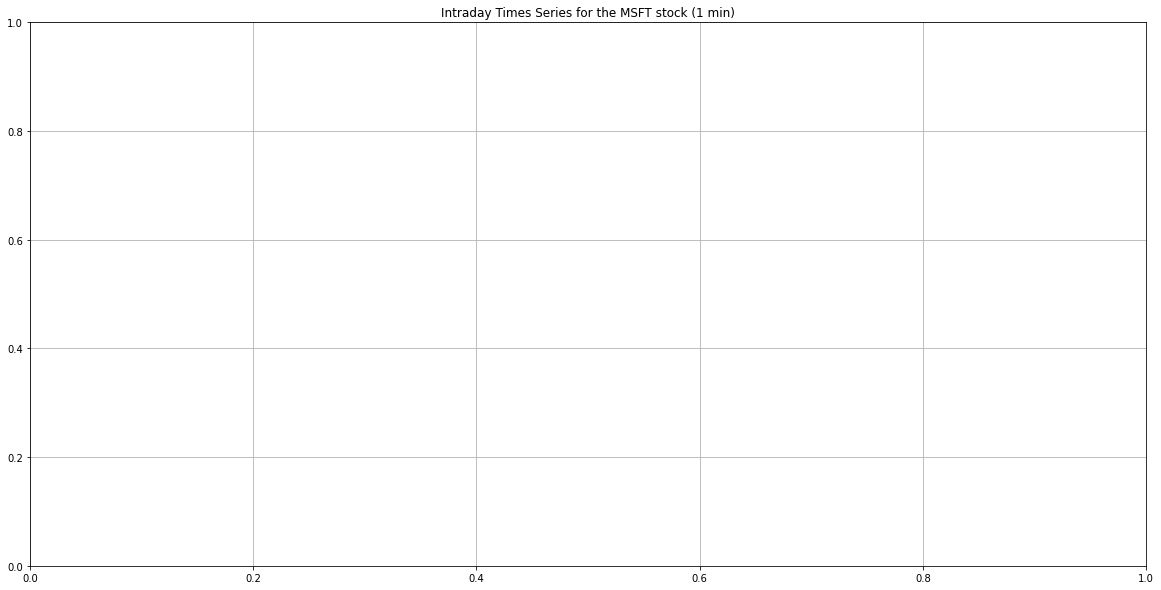

MSFT
+--------------------+------+-------------------+------+------+------+------+
|                 _id| close|               date|  high|   low|  open|volume|
+--------------------+------+-------------------+------+------+------+------+
|[5f596de123fa1d65...| 203.0|2020-09-08 20:00:00| 203.0|202.88|202.88| 775.0|
|[5f596de123fa1d65...| 202.5|2020-09-08 19:59:00| 202.9| 202.5| 202.9|1436.0|
|[5f596de123fa1d65...| 202.9|2020-09-08 19:58:00| 202.9| 202.9| 202.9| 908.0|
|[5f596de123fa1d65...| 203.0|2020-09-08 19:57:00| 203.0|202.76|202.86|1058.0|
|[5f596de123fa1d65...| 203.0|2020-09-08 19:56:00| 203.1| 203.0| 203.1|4661.0|
|[5f596de123fa1d65...| 203.0|2020-09-08 19:55:00|203.07| 203.0|203.07|1242.0|
|[5f596de123fa1d65...|203.02|2020-09-08 19:54:00| 203.2| 203.0|203.19|1354.0|
|[5f596de123fa1d65...|202.85|2020-09-08 19:52:00|202.85|202.83|202.83| 919.0|
|[5f596de123fa1d65...| 202.8|2020-09-08 19:51:00| 203.0|202.76|202.76|2411.0|
|[5f596de123fa1d65...|202.85|2020-09-08 19:50:00|202.85| 20

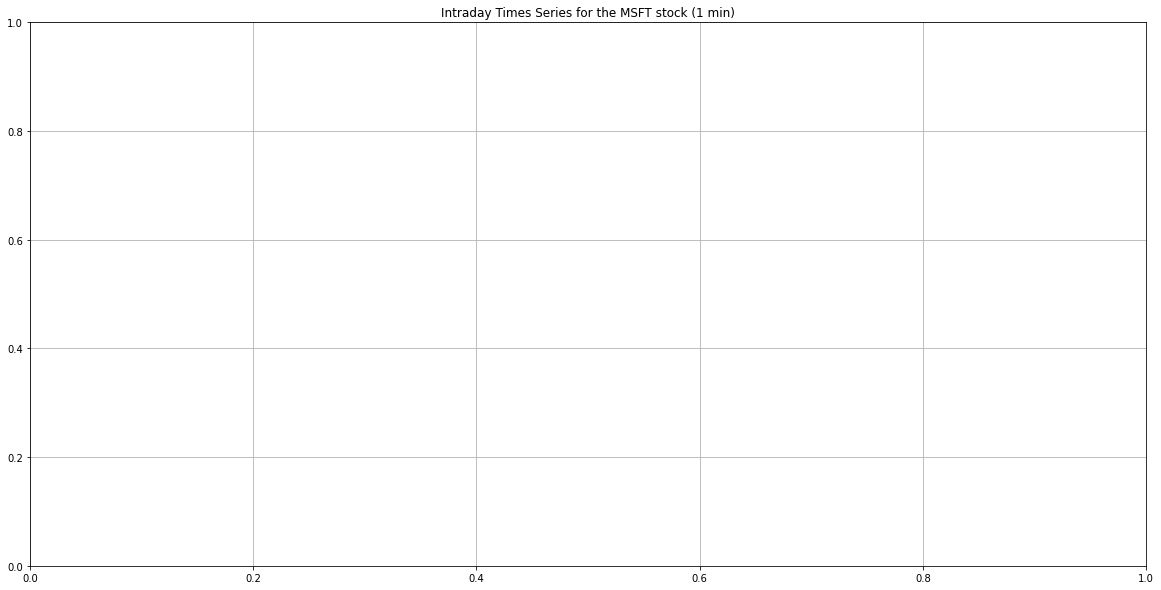

IBM
+--------------------+-------+-------------------+-------+------+-------+--------+
|                 _id|  close|               date|   high|   low|   open|  volume|
+--------------------+-------+-------------------+-------+------+-------+--------+
|[5f59027923fa1d65...| 120.58|2020-09-08 18:24:00| 120.58|120.58| 120.58|   235.0|
|[5f59027923fa1d65...| 120.86|2020-09-08 18:21:00| 120.86|120.86| 120.86|   250.0|
|[5f59027923fa1d65...| 120.86|2020-09-08 18:19:00| 120.86|120.86| 120.86|   200.0|
|[5f59027923fa1d65...| 120.86|2020-09-08 18:09:00| 120.86|120.86| 120.86|   175.0|
|[5f59027923fa1d65...| 121.35|2020-09-08 17:23:00| 121.35|121.35| 121.35|   108.0|
|[5f59027923fa1d65...|  121.5|2020-09-08 17:22:00|  121.5| 121.5|  121.5|   219.0|
|[5f59027923fa1d65...|  121.7|2020-09-08 17:21:00|  121.7| 121.7|  121.7|   400.0|
|[5f59027923fa1d65...| 121.55|2020-09-08 17:11:00| 121.55|121.55| 121.55|   150.0|
|[5f59027923fa1d65...|  121.5|2020-09-08 17:08:00|  121.5| 121.5|  121.5|   150.0|


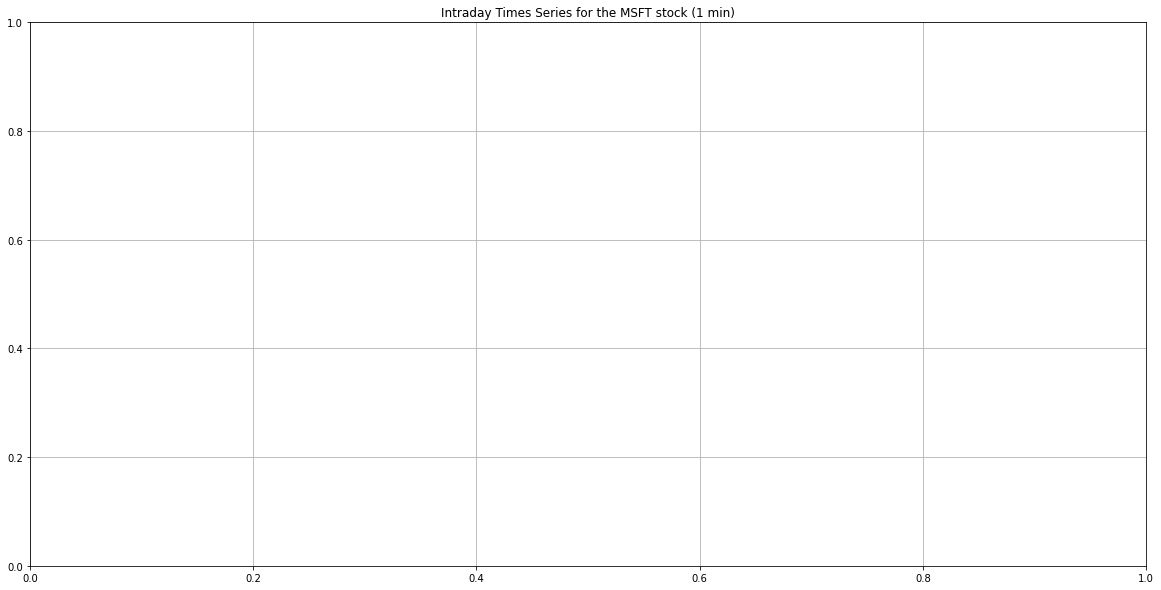

In [18]:
def get_data(liste_compagny):
    for i in range(len(liste_compagny)):
        spark = pyspark.sql.SparkSession.builder\
            .appName('test-mongo')\
            .config("spark.mongodb.input.uri", f"mongodb://my-mongo/trading.{liste_compagny[i]}") \
            .config("spark.mongodb.output.uri", f"mongodb://my-mongo/trading.{liste_compagny[i]}") \
            .getOrCreate()
    
        sc = spark.sparkContext
        # RDD SPARK
        rdd = spark.read.format("com.mongodb.spark.sql.DefaultSource").load()
        print(liste_compagny[i])
        rdd.show()
        # DATASET PANDAS
        df = rdd.select("*").toPandas()
        data = {}
        data[f"{liste_compagny[i]}"] = df
        #df['close'].plot()
        plt.title('Intraday Times Series for the MSFT stock (1 min)')
        plt.grid()
        plt.show()
        #print(df['close'])
    return data
 
if __name__ == "__main__":
    data = get_data(liste_compagny)  

In [19]:
data

{'IBM':                               _id   close                 date    high  \
 0     (5f59027923fa1d6586a4cf9b,)  120.58  2020-09-08 18:24:00  120.58   
 1     (5f59027923fa1d6586a4cf9c,)  120.86  2020-09-08 18:21:00  120.86   
 2     (5f59027923fa1d6586a4cf9d,)  120.86  2020-09-08 18:19:00  120.86   
 3     (5f59027923fa1d6586a4cf9e,)  120.86  2020-09-08 18:09:00  120.86   
 4     (5f59027923fa1d6586a4cf9f,)  121.35  2020-09-08 17:23:00  121.35   
 ...                           ...     ...                  ...     ...   
 3795  (5f59027923fa1d6586a4de71,)  124.40  2020-08-26 06:53:00  124.40   
 3796  (5f59027923fa1d6586a4de72,)  124.41  2020-08-26 08:50:00  124.41   
 3797  (5f59027923fa1d6586a4de73,)  124.24  2020-08-26 08:01:00  124.60   
 3798  (5f59027923fa1d6586a4de74,)  124.41  2020-08-26 06:58:00  124.41   
 3799  (5f59027923fa1d6586a4de75,)  125.09  2020-08-26 05:12:00  125.09   
 
          low    open  volume  
 0     120.58  120.58   235.0  
 1     120.86  120.86   250

In [8]:
for i in range(len(liste_compagny)):
    spark = pyspark.sql.SparkSession.builder\
        .appName('test-mongo')\
        .config("spark.mongodb.input.uri", f"mongodb://mongo/trading.{liste_compagny[i]}") \
        .config("spark.mongodb.output.uri", f"mongodb://mongo/trading.{liste_compagny[i]}") \
        .getOrCreate()
    print(liste_compagny[i])
    spark.read \
    .format("com.mongodb.spark.sql.DefaultSource") \
    .load() \
    .show()

TOT
++
||
++
++

TSLA
+--------------------+--------+-------------------+--------+-------+------+-------+
|                 _id|   close|               date|    high|    low|  open| volume|
+--------------------+--------+-------------------+--------+-------+------+-------+
|[5f596dca23fa1d65...|  324.31|2020-09-08 19:57:00|   325.5| 324.28| 325.2|10538.0|
|[5f596dca23fa1d65...|  325.75|2020-09-08 19:56:00|  325.75|  325.0|325.28|14457.0|
|[5f596dca23fa1d65...|  325.75|2020-09-08 19:55:00|325.8499| 324.34|324.34|20974.0|
|[5f596dca23fa1d65...|  324.13|2020-09-08 19:54:00|  324.49|  323.2| 323.5|18008.0|
|[5f596dca23fa1d65...|  323.35|2020-09-08 19:53:00|  323.35|  323.0|323.23| 9300.0|
|[5f596dca23fa1d65...|  323.15|2020-09-08 19:52:00|   323.4|  323.0|323.15| 6516.0|
|[5f596dca23fa1d65...|323.8999|2020-09-08 19:59:00|   324.6|  323.6|324.36|20221.0|
|[5f596dca23fa1d65...|  322.36|2020-09-08 19:50:00|  322.63| 322.26| 322.5| 8812.0|
|[5f596dca23fa1d65...|   322.4|2020-09-08 19:49:00|  3

## Recuperation des données depuis la base de donné mongodb 
    - convert collection database in pandas

In [48]:
def get_df(name):
    spark = pyspark.sql.SparkSession.builder\
        .appName('test-mongo')\
        .config("spark.mongodb.input.uri", "mongodb://my-mongo/trading."+name) \
        .config("spark.mongodb.output.uri", "mongodb://my-mongo/trading."+name ) \
        .getOrCreate()
    
    sc = spark.sparkContext
    rdd = spark.read.format("com.mongodb.spark.sql.DefaultSource").load()
    df = rdd.select("*").toPandas()
    print(f"convert {name} done...")
    return df
 
if __name__ == "__main__":
    NAME = ["TOTAL", "TSLA", "IBM","MSFT" ]
    data = {k:get_df(k) for k in NAME}

convert TOTAL done...
convert TSLA done...
convert IBM done...
convert MSFT done...


In [50]:
ibm = data['IBM']
total = data['TOTAL']
msft = data['MSFT']
tsla = data['TSLA']

In [56]:
total.head()

,_id,close,date,high,low,open,volume
0,"(5f596dd323fa1d6586a53bc8,)",38.570,2020-09-08 18:40:00,38.570,38.57,38.570,100.0
1,"(5f596dd323fa1d6586a53bc9,)",38.010,2020-09-08 16:01:00,38.210,38.01,38.210,8745.0
2,"(5f596dd323fa1d6586a53bca,)",38.010,2020-09-08 16:00:00,38.110,38.01,38.110,55699.0
3,"(5f596dd323fa1d6586a53bcb,)",38.120,2020-09-08 15:59:00,38.120,38.08,38.085,28198.0
4,"(5f596dd323fa1d6586a53bcc,)",38.085,2020-09-08 15:58:00,38.115,38.08,38.100,19793.0


In [41]:
import numpy as np
import pylab 
import scipy.stats as stats

In [42]:
# pip install scipy

In [69]:
compagnys = [ibm,total, msft,tsla]

In [64]:
for compagny in compagnys:
    compagny.index = pd.to_datetime(compagny.date)
    compagny.drop(['date','_id'], axis=1, inplace=True)

In [66]:
total.head()

,close,high,low,open,volume
date,,,,,
2020-09-08 18:40:00,38.570,38.570,38.57,38.570,100.0
2020-09-08 16:01:00,38.010,38.210,38.01,38.210,8745.0
2020-09-08 16:00:00,38.010,38.110,38.01,38.110,55699.0
2020-09-08 15:59:00,38.120,38.120,38.08,38.085,28198.0
2020-09-08 15:58:00,38.085,38.115,38.08,38.100,19793.0


In [67]:
total.shape

(3705, 5)

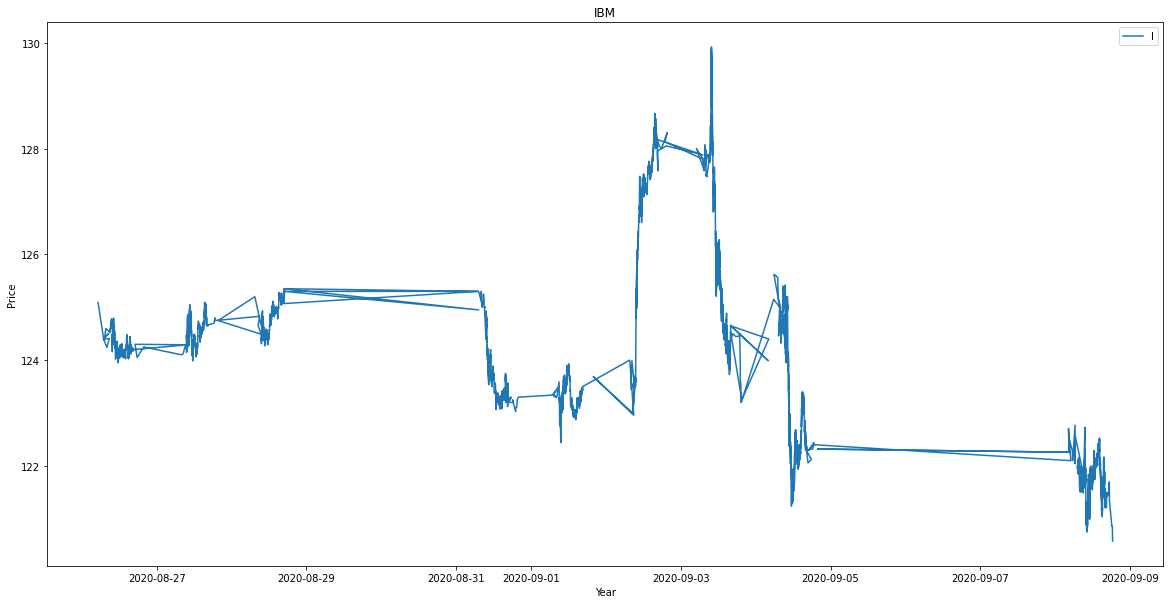

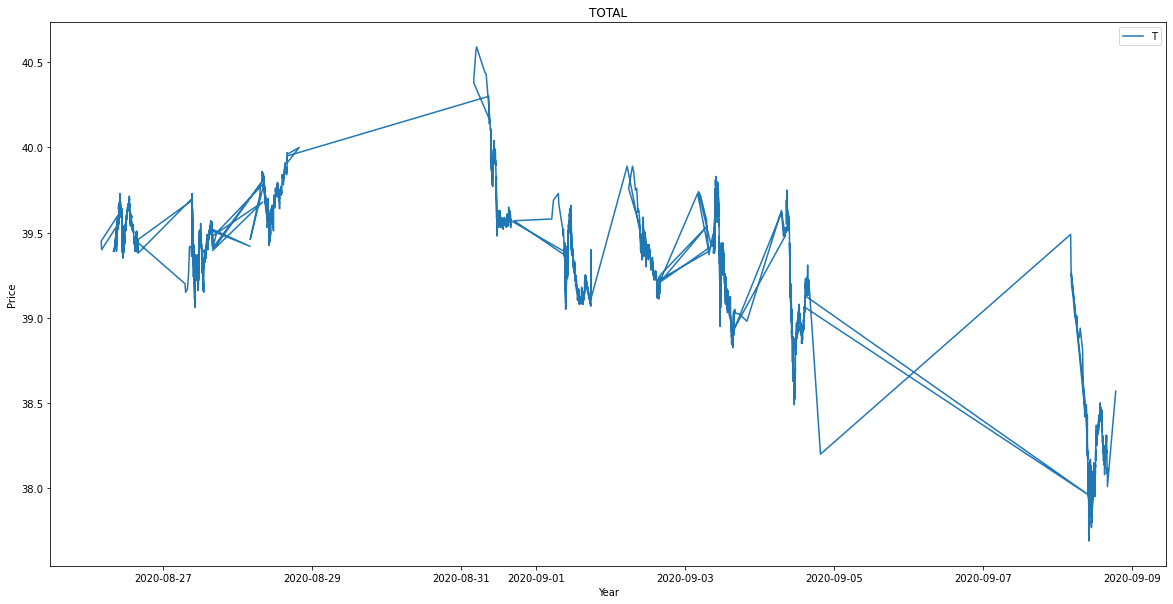

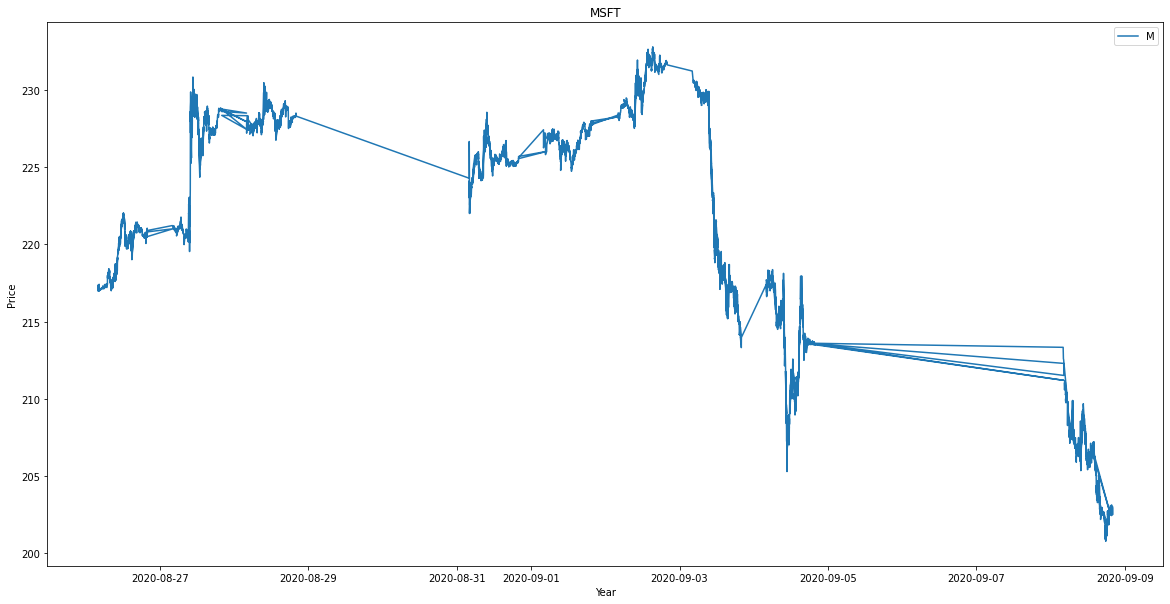

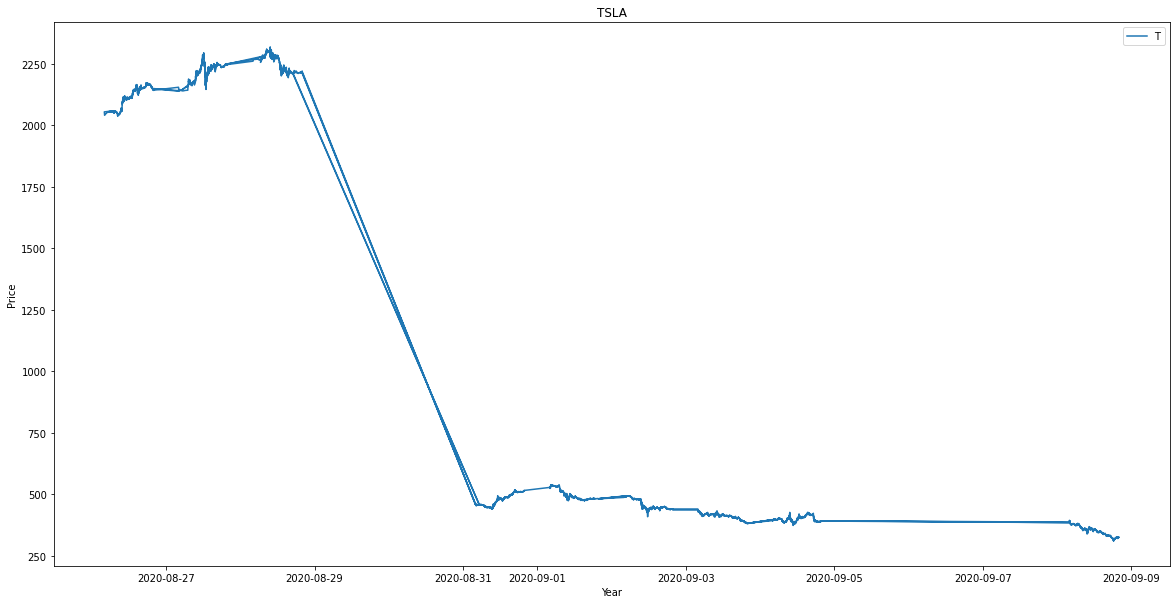

In [72]:
compagnys_liste = ["IBM","TOTAL", "MSFT","TSLA"]
for i, compagny in enumerate(compagnys):
    plt.plot(compagny.index, compagny['close'])
    plt.title(compagnys_liste[i])
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.legend(compagnys_liste[i])
    plt.show()

## Vérifier la distribution normale

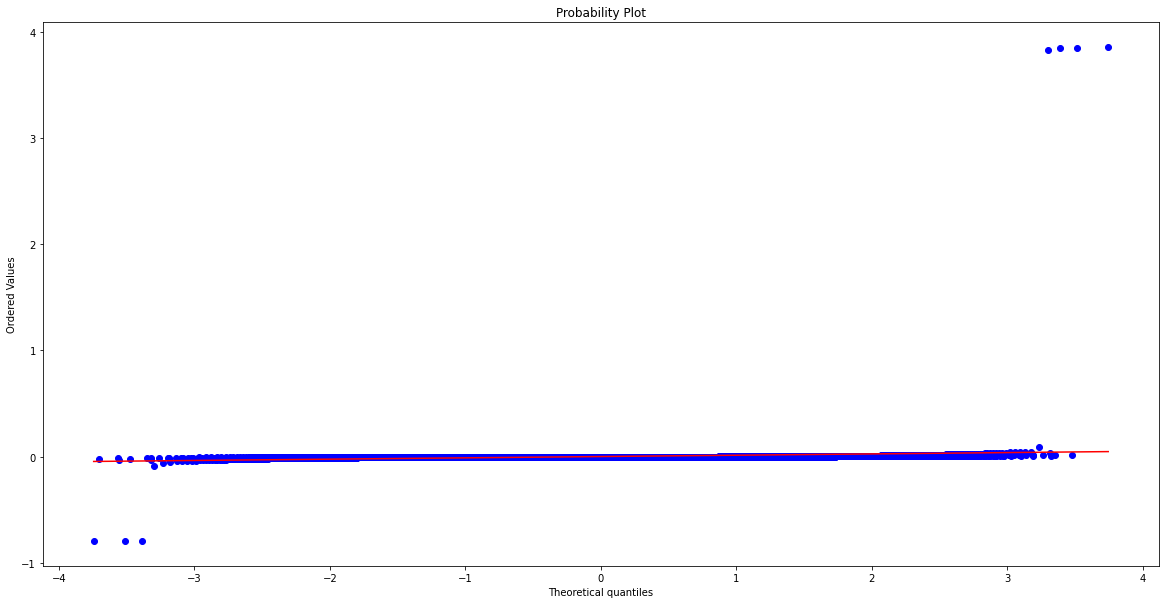

In [78]:
for i in range(len(compagnys)):
    compagnys[i]['prix_chg'] = compagnys[i]['close'].pct_change()[1:]
    compagny.dropna(inplace=True, axis=0)
    stats.probplot(compagnys[i]['prix_chg'], dist="norm", plot=pylab)